In [1]:
##############################
######The great shift ########
##############################
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
import math
root = 'project/wyin/jlee/ml-project'
util_loc = os.path.join(root, "utils")
sys.path.append(util_loc)
data_loc = '/project/wyin/jlee/ml-project/dos-prediction-full/data'
k_data_loc = '/project/wyin/jlee/ml-project/data-collection/full-dataset/data'

In [2]:
train_set = np.load(os.path.join(data_loc, 'train-set.npz'))
train_params = train_set['params']

val_set = np.load(os.path.join(data_loc, 'val-set.npz'))
val_params = val_set['params']

test_set = np.load(os.path.join(data_loc, 'test-set.npz'))
test_params = test_set['params']

In [6]:
def min_max(param_arr):
    count = 0
    mx = -1e6
    mn = 1e6
    mx_params = (-1, -1, -1)
    mn_params = (-1, -1, -1)
    for t1, t2, j in param_arr:
        if t1 < 0 and t2 > 0:
            k_dat = np.loadtxt(os.path.join(k_data_loc, f'param_{t1:.2f}_{t2:.2f}_{j:.3f}', 'disp_10-01.dat'))
            e_m = k_dat[32, 1]
            
            if e_m > mx:
                mx = e_m
                mx_params = (t1, t2, j)
            
            if e_m < mn:
                mn = e_m
                mn_params = (t1, t2, j)
            
    return mn, mx, mn_params, mx_params
    
print(min_max(train_params))
print(min_max(val_params))
print(min_max(test_params))


(-3.74812, -1.66401, (-0.5, 0.5, 0.2), (-0.02, 0.02, 1.0))
(-3.65977, -1.71411, (-0.4, 0.5, 0.216), (-0.06, 0.02, 0.968))
(-3.69677, -1.68959, (-0.48, 0.5, 0.232), (-0.06, 0.02, 1.0))


In [9]:
print(6 + 3.74812)
print(-6 + 1.66401)

9.74812
-4.33599


In [7]:
w_min = -6 - max(mx1, mx2, mx3)
w_max = 6 - min(mn1, mn2, mn3)

w_min = np.round(w_min, 2)
w_max = np.round(w_max, 2)
print(w_min)
print(w_max)

NameError: name 'mx1' is not defined

In [42]:
#Set limits so the whole space can be sampled with dw = 0.04 intervals
w_min = -4.36
w_max = 9.76

In [127]:
def new_dos(params):
    
    t1, t2, j = params
    dos_dat = np.loadtxt(os.path.join(k_data_loc, f'param_{t1:.2f}_{t2:.2f}_{j:.3f}', 'dos.dat'))
    k_dat = np.loadtxt(os.path.join(k_data_loc, f'param_{t1:.2f}_{t2:.2f}_{j:.3f}', 'disp_10-01.dat'))
    e_m = np.round(k_dat[32, 1], 2)

    w_left = np.round(-6 - e_m, 2)
    w_right = np.round(6 - e_m, 2)
    
    n_left = np.round((w_left - w_min) / 0.04, 2)
    n_right = np.round((w_max - w_right) / 0.04, 2)
    n_left = math.ceil(n_left) #Number of zeros to pad left side with
    n_right = math.ceil(n_right)
    
    first_w = np.round(w_min + 0.04 * n_left, 2)
    first_ind = round((first_w - w_left) / 0.01)
    middle_dos = dos_dat[first_ind:1201:4, 1].tolist()
    
    full_dos = n_left * [0] + middle_dos + n_right * [0]
    
#     print(f"n_left: {n_left}, n_mid: {len(middle_dos)}, n_right: {n_right}")
#     print(f"w_left: {w_left}, w_right: {w_right}")
    return full_dos

def new_param_dos(params):
    return_params = []
    return_dos = []
    i = 0
    for i, [t1, t2, j] in enumerate(params):
            if t1 < 0 and t2 > 0:
                dos = new_dos([t1, t2, j])
                if len(dos) != 354:
                    print(f"something wrong with {i}")
                return_dos.append(dos)
                return_params.append([t1, t2, j])
                
                
            if i % 10000 == 0:
                print(f"done with {i}")

    return_params = np.array(return_params)
    return_dos = np.array(return_dos)
    
    return return_params, return_dos

In [128]:
new_train_params, new_train_dos = new_param_dos(train_params)

done with 0
done with 10000
done with 20000
done with 30000
done with 40000
done with 50000
done with 60000
done with 70000
done with 80000
done with 90000
done with 100000


In [135]:
new_val_params, new_val_dos = new_param_dos(val_params)
new_test_params, new_test_dos = new_param_dos(test_params)

done with 0
done with 10000
done with 0
done with 10000


In [137]:
np.savez("data/train-set", params = new_train_params, dos = new_train_dos)

In [138]:
np.savez("data/val-set", params = new_val_params, dos = new_val_dos)
np.savez("data/test-set", params = new_test_params, dos = new_test_dos)

In [140]:
train_set = np.load("data/train-set.npz")
train_dos = train_set['dos']

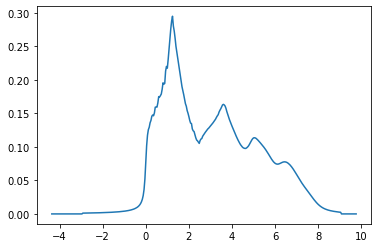

In [141]:
plt.plot(np.linspace(-4.36, 9.76, 354), train_dos[0])